# Data quality
In this notebook we analyze the data quality refered to COVID19 in Mexico. This information in obtained thought the Secretariat of Health and published by *Dirección General de Epidemiología* the mexican CDC. https://www.gob.mx/salud/documentos/datos-abiertos-152127. 

In [1]:

import glob
import os
import pandas as pd
import numpy as np
import random
import datetime
from IPython.display import Markdown as md
from scipy import stats
from tools import replace_all_fields
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib 

Using matplotlib backend: MacOSX


/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load data

In [2]:

# load the csv from the src folder
strpath = '../src/'
m = []
i =0

for filename in glob.glob(strpath+"*"):
    if filename.find('.csv')>0:
        date = '20'+filename[7:9] +'-' + filename[11:13] +'-' +filename[13:15]
        print(date)
        df = pd.read_csv(filename, encoding = "ISO-8859-1",dtype =str)
        df['FechaRegistro'] = date
        replace_all_fields(df)
        if i== 0:
            df0=df.copy()
            i=1
        else:
            frame = [df0,df]
            df0 = pd.concat(frame)
        del df

2020-06-04
2020-06-10
2020-04-12
2020-04-13
2020-06-11
2020-06-05
2020-06-13
2020-06-07
2020-06-06
2020-06-12
2020-06-16
2020-06-02
2020-04-14
2020-04-28
2020-04-29
2020-04-15
2020-06-03
2020-06-17
2020-06-01
2020-06-15
2020-06-29
2020-04-17
2020-04-16
2020-06-28
2020-06-14
2020-05-11
2020-05-05
2020-07-13
2020-07-07
2020-07-06
2020-07-12
2020-05-04
2020-05-10
2020-05-06
2020-05-12
2020-07-04
2020-07-10
2020-07-11
2020-07-05
2020-05-13
2020-05-07
2020-05-03
2020-05-17
2020-07-01
2020-07-15
2020-07-29
2020-07-28
2020-07-14
2020-05-16
2020-05-02
2020-05-14
2020-05-28
2020-07-16
2020-07-02
2020-07-03
2020-07-17
2020-05-29
2020-05-01
2020-05-15
2020-05-18
2020-05-30
2020-05-24
2020-07-26
2020-07-27
2020-05-25
2020-05-31
2020-05-19
2020-05-27
2020-07-19
2020-07-25
2020-07-31
2020-07-30
2020-07-24
2020-07-18
2020-05-26
2020-05-22
2020-07-20
2020-07-08
2020-07-09
2020-07-21
2020-05-23
2020-05-21
2020-05-09
2020-07-23
2020-07-22
2020-05-08
2020-05-20
2020-08-02
2020-06-19
2020-06-25
2020-04-27

In [4]:
df0.shape

(48733150, 36)

In [9]:
df0['LastDay']  = df0.groupby('ID_REGISTRO')['FechaRegistro'].transform('max')
df0['FirstDay'] = df0.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')
df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
df0.LastDay = pd.to_datetime(df0['LastDay'], format='%Y-%m-%d')
df0.FirstDay = pd.to_datetime(df0['FirstDay'], format='%Y-%m-%d')
df0['Duration'] = (df0.LastDay - df0.FirstDay).dt.days
df0['numRecords']  = df0.groupby('ID_REGISTRO')['FechaRegistro'].transform('count')
df0['DurationRecords'] = df0['Duration'] - df0['numRecords']
df0 = df0.sort_values(by='FechaRegistro', ascending=False)
df0.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,LastDay,FirstDay,Duration,numRecords,DurationRecords
318659,2020-08-05,0347b3,FUERA DE USMER,SSA,TLAXCALA,MUJER,MÉXICO,TLAXCALA,TLAXCALA025,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-05,2020-08-05,2020-05-14,83,84,-1
347281,2020-08-05,15d482,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,CIUDAD DE MEXICO005,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-05,2020-08-05,2020-05-29,68,69,-1
347294,2020-08-05,0c5b3a,USMER,SSA,CIUDAD DE MÉXICO,MUJER,VERACRUZ DE IGNACIO DE LA LLAVE,MÉXICO,MEXICO109,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-05,2020-08-05,2020-06-30,36,37,-1
347293,2020-08-05,16b7e9,USMER,SSA,GUANAJUATO,HOMBRE,GUANAJUATO,GUANAJUATO,GUANAJUATO020,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-05,2020-08-05,2020-06-29,37,38,-1
347292,2020-08-05,0a8cac,USMER,SSA,NUEVO LEÓN,MUJER,NUEVO LEÓN,NUEVO LEÓN,NUEVO LEON039,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-05,2020-08-05,2020-05-26,71,72,-1


In [10]:
md("We have {0} records of covid evolution cases in Mexico until today {1}".format(df0.shape[0], datetime.datetime.now()) )


We have 48733150 records of covid evolution cases in Mexico until today 2020-08-05 23:26:31.686951

In [12]:
today = (datetime.datetime.now()).strftime("%Y%m%d")
# today = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
yesterday = (datetime.datetime.now() - datetime.timedelta(days=1)).strftime("%Y%m%d")
ereyesterday = (datetime.datetime.now() - datetime.timedelta(days=2)).strftime("%Y%m%d")
df= pd.read_csv( '../src/'+today       +'.csv', encoding = "ISO-8859-1",dtype =str)
dfA= pd.read_csv('../src/'+yesterday   +'.csv', encoding = "ISO-8859-1",dtype =str)
dfB= pd.read_csv('../src/'+ereyesterday+'.csv', encoding = "ISO-8859-1",dtype =str)

## 1 How many cases we have in the last report vs db?

In [13]:
# we get unique cases globaly and from the last csv 
global_ids = df0.ID_REGISTRO.unique().tolist()
last_ids  = df.ID_REGISTRO.unique().tolist()
# we get the cases that are present in previous reports but they doesn't show in the last report
untracket_cases = set(global_ids)- set(last_ids)
tracket_cases = set(last_ids)

In [14]:
df0.FECHA_SINTOMAS = pd.to_datetime(df0['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [15]:
# we extract the records that does not exist in the last report
df1 = df0[df0.ID_REGISTRO.isin(untracket_cases)]
df1 = df1.copy()

md("we have {0} register that are not tracket".format(df1.ID_REGISTRO.nunique()) )

we have 37251 register that are not tracket

1. How many days the records exist
2. Is there some kind or relation between the records?

In [16]:
df1.FECHA_SINTOMAS = pd.to_datetime(df1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
df1.FECHA_ACTUALIZACION = pd.to_datetime(df1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format ='%Y-%m-%d')


In [17]:
# we get the duration of cases between records
df1['LastDay']  = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('max')
df1['FirstDay'] = df1.groupby('ID_REGISTRO')['FechaRegistro'].transform('min')
df1['Duration'] = (df1.LastDay - df1.FirstDay).dt.days

In [18]:
# We keep only one case to get plot correctly the cases
df3 = df1.drop_duplicates(keep='first')
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
df_3 = df3.groupby(['RESULTADO','Duration'])['Duration'].count().to_frame(name = 'count').reset_index()
# sns.lineplot(x='Duration', y='count', data=df_3, hue='RESULTADO');

In [19]:
len(df1[df1.Duration!=0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI']))

48419

In [ ]:
len(df3)

In [ ]:
# records with more than one day
len(df3[df3.Duration!=0])

In [ ]:
# records that only survive one day
len(df3[df3.Duration==0])

In [26]:
df1.ID_REGISTRO.nunique()

37251

In [27]:
df1R = df1[df1.Duration!=0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'])

In [28]:
df1R.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,LastDay,FirstDay,Duration,numRecords,DurationRecords
768458,2020-08-04,10280b,FUERA DE USMER,IMSS,JALISCO,MUJER,NAYARIT,JALISCO,JALISCO067,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-04,2020-08-04,2020-07-28,7,8,-1
779482,2020-08-04,14288d,USMER,IMSS,CAMPECHE,HOMBRE,CAMPECHE,CAMPECHE,CAMPECHE002,HOSPITALIZADO,...,NO ESPECIFICADO,MÃ©xico,99,NO,2020-08-04,2020-08-04,2020-07-06,29,30,-1
838560,2020-08-04,0d213f,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,CIUDAD DE MEXICO007,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-04,2020-08-04,2020-07-03,32,33,-1
796938,2020-08-04,1272b2,FUERA DE USMER,IMSS,VERACRUZ DE IGNACIO DE LA LLAVE,MUJER,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE065,HOSPITALIZADO,...,NO ESPECIFICADO,MÃ©xico,99,NO,2020-08-04,2020-08-04,2020-08-01,3,4,-1
633755,2020-08-04,0474c1,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,CIUDAD DE MEXICO011,HOSPITALIZADO,...,NO ESPECIFICADO,MÃ©xico,99,NO,2020-08-04,2020-08-04,2020-05-07,89,90,-1


In [29]:
df1[df1.Duration==0].drop_duplicates(['ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI']).head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,LastDay,FirstDay,Duration,numRecords,DurationRecords
753957,2020-08-04,125e73,FUERA DE USMER,IMSS,SONORA,MUJER,SONORA,SONORA,SONORA002,HOSPITALIZADO,...,NO ESPECIFICADO,MÃ©xico,99,NO,2020-08-04,2020-08-04,2020-08-04,0,1,-1
1023923,2020-08-04,18858d,FUERA DE USMER,SSA,BAJA CALIFORNIA SUR,MUJER,GUERRERO,BAJA CALIFORNIA SUR,BAJA CALIFORNIA SUR008,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-04,2020-08-04,2020-08-04,0,1,-1
1018381,2020-08-04,0e42ae,FUERA DE USMER,SSA,COAHUILA DE ZARAGOZA,HOMBRE,COAHUILA DE ZARAGOZA,COAHUILA DE ZARAGOZA,COAHUILA DE ZARAGOZA028,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-04,2020-08-04,2020-08-04,0,1,-1
1022437,2020-08-04,1e0610,USMER,IMSS,MICHOACÁN DE OCAMPO,HOMBRE,MICHOACÁN DE OCAMPO,MICHOACÁN DE OCAMPO,MICHOACAN DE OCAMPO053,HOSPITALIZADO,...,NO ESPECIFICADO,MÃ©xico,99,NO,2020-08-04,2020-08-04,2020-08-04,0,1,-1
1023085,2020-08-04,0872e1,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,MÉXICO,MÉXICO,MEXICO013,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-08-04,2020-08-04,2020-08-04,0,1,-1


In [30]:
df1[df1.ID_REGISTRO=='1288df']

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,FechaRegistro,LastDay,FirstDay,Duration,numRecords,DurationRecords
112937,2020-07-06,1288df,FUERA DE USMER,IMSS,VERACRUZ DE IGNACIO DE LA LLAVE,HOMBRE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE,VERACRUZ DE IGNACIO DE LA LLAVE193,AMBULATORIO,...,NO ESPECIFICADO,MÃ©xico,99,NO APLICA,2020-07-06,2020-07-06,2020-07-06,0,1,-1


In [31]:
df3.shape[0]-df3[df3.Duration==0].shape[0]

35125

In [32]:
df_3.head(30)

,RESULTADO,Duration,count
0,No positivo SARS-CoV-2,0,16
1,No positivo SARS-CoV-2,1,49
2,No positivo SARS-CoV-2,2,79
3,No positivo SARS-CoV-2,3,121
4,No positivo SARS-CoV-2,4,1817
5,No positivo SARS-CoV-2,5,97
6,No positivo SARS-CoV-2,6,104
7,No positivo SARS-CoV-2,7,127
8,No positivo SARS-CoV-2,8,106
9,No positivo SARS-CoV-2,9,90


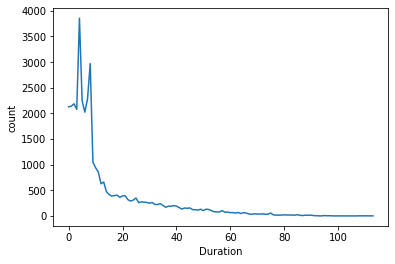

In [33]:
df_3 = df3.groupby(['Duration'])['Duration'].count().to_frame(name = 'count').reset_index()
sns.lineplot(x='Duration',y='count',  data=df_3[['Duration','count']],)#, palette=sns.color_palette("Set1", 3))

In [36]:
df3['EDAD_int'] = df3.EDAD.astype(int)

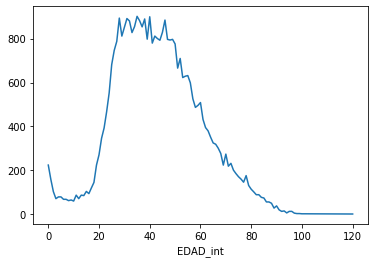

In [40]:
df3.groupby('EDAD_int')['EDAD_int'].count().plot()

In [41]:
df1.FechaRegistro = pd.to_datetime(df1['FechaRegistro'], format='%Y-%m-%d')
df1 = df1.sort_values(by='FechaRegistro', ascending=False)

In [42]:
df3.shape

(37251, 42)

In [43]:
print(len(df1))
df3 = df1.drop_duplicates(keep='first')
# print(len(df3))
df3 = df3.drop_duplicates('ID_REGISTRO',keep='first')
# print(len(df3))
print(len(df1))

551033
551033


In [44]:
df3.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'LastDay', 'FirstDay',
       'Duration', 'numRecords', 'DurationRecords'],
      dtype='object')

In [45]:
df3.groupby(['ORIGEN'])['ORIGEN'].count().sort_values(ascending=False).head(19)

ORIGEN
FUERA DE USMER    24998
USMER             12253
Name: ORIGEN, dtype: int64

In [46]:
df3.groupby('SECTOR')['SECTOR'].count().sort_values( ascending=False)

SECTOR
SSA                20091
IMSS               11200
PRIVADA             2437
ISSSTE              1272
ESTATAL              981
NO ESPECIFICADO      334
PEMEX                268
SEDENA               250
SEMAR                210
MUNICIPAL            132
UNIVERSITARIO         45
IMSS-BIENESTAR        20
CRUZ ROJA              6
DIF                    5
Name: SECTOR, dtype: int64

In [47]:
df3.groupby('ENTIDAD_UM')['ENTIDAD_UM'].count().sort_values( ascending=False)

ENTIDAD_UM
CIUDAD DE MÉXICO                   6783
MÉXICO                             5993
COAHUILA DE ZARAGOZA               2163
NUEVO LEÓN                         2153
TABASCO                            2113
JALISCO                            1734
MICHOACÁN DE OCAMPO                1350
VERACRUZ DE IGNACIO DE LA LLAVE    1265
BAJA CALIFORNIA                    1265
PUEBLA                             1257
OAXACA                             1176
SINALOA                            1117
CHIHUAHUA                          1088
GUANAJUATO                          877
CHIAPAS                             804
SONORA                              654
TAMAULIPAS                          532
QUINTANA ROO                        522
GUERRERO                            503
YUCATÁN                             474
MORELOS                             451
BAJA CALIFORNIA SUR                 422
QUERÉTARO                           405
AGUASCALIENTES                      371
DURANGO                      

In [48]:
df3.groupby('SEXO')['SEXO'].count().sort_values( ascending=False)

SEXO
HOMBRE    19221
MUJER     18030
Name: SEXO, dtype: int64

In [49]:
df3.groupby('ENTIDAD_NAC')['ENTIDAD_NAC'].count().sort_values( ascending=False)

ENTIDAD_NAC
MÉXICO                             5859
CIUDAD DE MÉXICO                   5614
COAHUILA DE ZARAGOZA               2038
TABASCO                            1982
NUEVO LEÓN                         1792
VERACRUZ DE IGNACIO DE LA LLAVE    1787
JALISCO                            1570
OAXACA                             1453
MICHOACÁN DE OCAMPO                1364
PUEBLA                             1325
SINALOA                            1286
NO ESPECIFICADO                    1234
GUANAJUATO                          950
CHIAPAS                             944
CHIHUAHUA                           896
GUERRERO                            865
BAJA CALIFORNIA                     738
SONORA                              646
TAMAULIPAS                          590
YUCATÁN                             520
DURANGO                             471
MORELOS                             405
HIDALGO                             401
TLAXCALA                            366
NAYARIT                     

In [50]:
df3.groupby('ENTIDAD_NAC')['ENTIDAD_NAC'].count().sort_values( ascending=False)

ENTIDAD_NAC
MÉXICO                             5859
CIUDAD DE MÉXICO                   5614
COAHUILA DE ZARAGOZA               2038
TABASCO                            1982
NUEVO LEÓN                         1792
VERACRUZ DE IGNACIO DE LA LLAVE    1787
JALISCO                            1570
OAXACA                             1453
MICHOACÁN DE OCAMPO                1364
PUEBLA                             1325
SINALOA                            1286
NO ESPECIFICADO                    1234
GUANAJUATO                          950
CHIAPAS                             944
CHIHUAHUA                           896
GUERRERO                            865
BAJA CALIFORNIA                     738
SONORA                              646
TAMAULIPAS                          590
YUCATÁN                             520
DURANGO                             471
MORELOS                             405
HIDALGO                             401
TLAXCALA                            366
NAYARIT                     

In [51]:
df3.groupby('ENTIDAD_RES')['ENTIDAD_RES'].count().sort_values( ascending=False)

ENTIDAD_RES
MÉXICO                             6881
CIUDAD DE MÉXICO                   5734
NUEVO LEÓN                         2137
COAHUILA DE ZARAGOZA               2129
TABASCO                            2105
JALISCO                            1699
MICHOACÁN DE OCAMPO                1341
VERACRUZ DE IGNACIO DE LA LLAVE    1294
PUEBLA                             1242
BAJA CALIFORNIA                    1242
OAXACA                             1197
SINALOA                            1119
CHIHUAHUA                          1094
GUANAJUATO                          896
CHIAPAS                             822
SONORA                              678
GUERRERO                            542
TAMAULIPAS                          538
QUINTANA ROO                        527
MORELOS                             469
YUCATÁN                             468
BAJA CALIFORNIA SUR                 413
DURANGO                             393
QUERÉTARO                           390
AGUASCALIENTES              

In [ ]:
df3.groupby('MUNICIPIO_RES')['MUNICIPIO_RES'].count().sort_values( ascending=False)

In [53]:
df3.groupby('TIPO_PACIENTE')['TIPO_PACIENTE'].count()

TIPO_PACIENTE
AMBULATORIO      28013
HOSPITALIZADO     9238
Name: TIPO_PACIENTE, dtype: int64

In [54]:
df3.groupby('INTUBADO')['INTUBADO'].count().sort_values( ascending=False)

INTUBADO
NO APLICA          28013
NO                  8595
SI                   636
NO ESPECIFICADO        7
Name: INTUBADO, dtype: int64

In [55]:
df3.groupby('NEUMONIA')['NEUMONIA'].count().sort_values( ascending=False)

NEUMONIA
NO     30867
SI      6384
Name: NEUMONIA, dtype: int64

In [56]:
df3.groupby('EDAD')['EDAD'].count().sort_values( ascending=False)

EDAD
35     902
40     900
28     894
31     892
38     890
      ... 
98       3
99       3
100      2
101      2
120      1
Name: EDAD, Length: 103, dtype: int64

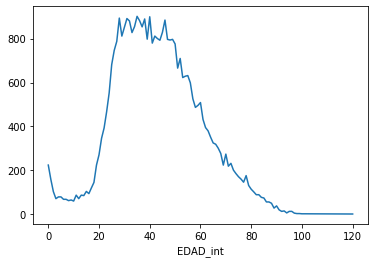

In [57]:
df3['EDAD_int'] = df3.EDAD.astype(int)
df3.groupby('EDAD_int')['EDAD_int'].count().plot()

In [58]:
df3.shape

(37251, 42)

In [59]:
df3.groupby('EMBARAZO')['EMBARAZO'].count().sort_values( ascending=False)

EMBARAZO
NO APLICA    19221
NO           17691
SI             264
SE IGNORA       75
Name: EMBARAZO, dtype: int64

In [60]:
df3.groupby('HABLA_LENGUA_INDIG')['HABLA_LENGUA_INDIG'].count().sort_values( ascending=False)

HABLA_LENGUA_INDIG
NO                 35769
NO ESPECIFICADO     1081
SI                   401
Name: HABLA_LENGUA_INDIG, dtype: int64

In [61]:
df3.groupby('DIABETES')['DIABETES'].count().sort_values( ascending=False)

DIABETES
NO           31961
SI            5079
SE IGNORA      211
Name: DIABETES, dtype: int64

In [62]:
df3.groupby('ASMA')['ASMA'].count().sort_values( ascending=False)

ASMA
NO           35841
SI            1229
SE IGNORA      181
Name: ASMA, dtype: int64

In [63]:
df3.groupby('INMUSUPR')['INMUSUPR'].count().sort_values( ascending=False)

INMUSUPR
NO           36422
SI             628
SE IGNORA      201
Name: INMUSUPR, dtype: int64

In [64]:
df3.groupby('HIPERTENSION')['HIPERTENSION'].count().sort_values( ascending=False)

HIPERTENSION
NO           30646
SI            6414
SE IGNORA      191
Name: HIPERTENSION, dtype: int64

In [65]:
df3.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI', 'FechaRegistro', 'LastDay', 'FirstDay',
       'Duration', 'numRecords', 'DurationRecords', 'EDAD_int'],
      dtype='object')

In [66]:
df3.groupby('OTRA_COM')['OTRA_COM'].count().sort_values( ascending=False)

OTRA_COM
NO           35698
SI            1257
SE IGNORA      296
Name: OTRA_COM, dtype: int64

In [67]:
df3.groupby('CARDIOVASCULAR')['CARDIOVASCULAR'].count().sort_values( ascending=False)

CARDIOVASCULAR
NO           36149
SI             902
SE IGNORA      200
Name: CARDIOVASCULAR, dtype: int64

In [68]:
df3.groupby('OBESIDAD')['OBESIDAD'].count().sort_values( ascending=False)

OBESIDAD
NO           31037
SI            6037
SE IGNORA      177
Name: OBESIDAD, dtype: int64

In [69]:
df3.groupby('RENAL_CRONICA')['RENAL_CRONICA'].count().sort_values( ascending=False)

RENAL_CRONICA
NO           36216
SI             851
SE IGNORA      184
Name: RENAL_CRONICA, dtype: int64

In [70]:
df3.groupby('TABAQUISMO')['TABAQUISMO'].count().sort_values( ascending=False)

TABAQUISMO
NO           34115
SI            2952
SE IGNORA      184
Name: TABAQUISMO, dtype: int64

In [71]:
df3.groupby('OTRO_CASO')['OTRO_CASO'].count().sort_values( ascending=False)

OTRO_CASO
SI                 12798
NO                 12726
NO ESPECIFICADO    11727
Name: OTRO_CASO, dtype: int64

In [72]:
df3.groupby('RESULTADO')['RESULTADO'].count().sort_values( ascending=False)

RESULTADO
Resultado pendiente       26767
No positivo SARS-CoV-2     6517
Positivo SARS-CoV-2        3967
Name: RESULTADO, dtype: int64

In [73]:
df3.groupby('MIGRANTE')['MIGRANTE'].count().sort_values( ascending=False)

MIGRANTE
NO ESPECIFICADO    37124
NO                    91
SI                    36
Name: MIGRANTE, dtype: int64

In [74]:
df3.groupby('PAIS_NACIONALIDAD')['PAIS_NACIONALIDAD'].count().sort_values( ascending=False)

PAIS_NACIONALIDAD
MÃ©xico                        35540
99                              1333
México                           142
Estados Unidos de AmÃ©rica        67
Colombia                          21
EspaÃ±a                           19
Brasil                            15
Cuba                              11
Argentina                          9
CanadÃ¡                            9
Venezuela                          8
Italia                             7
Guatemala                          6
Bolivia                            6
Francia                            6
PerÃº                              5
El Salvador                        5
Nicaragua                          4
JapÃ³n                             4
RepÃºblica de Honduras             4
Ecuador                            3
Macao                              3
HaitÃ­                             2
India                              2
Otro                               2
China                              2
RepÃºblica de Corea 

In [75]:
df3.groupby('PAIS_ORIGEN')['PAIS_ORIGEN'].count().sort_values( ascending=False)

PAIS_ORIGEN
99                           31958
97                            5257
Estados Unidos de América       11
Cuba                             3
El Salvador                      3
Italia                           3
Guatemala                        2
Ecuador                          2
Colombia                         2
Venezuela                        2
Francia                          1
España                           1
República de Honduras            1
Nicaragua                        1
China                            1
Brasil                           1
Argentina                        1
Otro                             1
Name: PAIS_ORIGEN, dtype: int64

In [76]:
df3.groupby('PAIS_ORIGEN')['PAIS_ORIGEN'].count().sort_values( ascending=False)

PAIS_ORIGEN
99                           31958
97                            5257
Estados Unidos de América       11
Cuba                             3
El Salvador                      3
Italia                           3
Guatemala                        2
Ecuador                          2
Colombia                         2
Venezuela                        2
Francia                          1
España                           1
República de Honduras            1
Nicaragua                        1
China                            1
Brasil                           1
Argentina                        1
Otro                             1
Name: PAIS_ORIGEN, dtype: int64

In [77]:
df3.groupby('UCI')['UCI'].count().sort_values( ascending=False)

UCI
NO APLICA          28013
NO                  8449
SI                   782
NO ESPECIFICADO        7
Name: UCI, dtype: int64

In [78]:
df3.groupby('EDAD')['EDAD'].count().sort_values( ascending=False)

EDAD
35     902
40     900
28     894
31     892
38     890
      ... 
98       3
99       3
100      2
101      2
120      1
Name: EDAD, Length: 103, dtype: int64

# personas que siguen en el sistema

In [ ]:
# we extract the records that does not live in the last report
dfO1 = df0[df0.ID_REGISTRO.isin(tracket_cases)]
dfO1 = dfO1.copy()
dfO1.shape


In [ ]:
dfO1.columns

In [ ]:
# df0.FechaRegistro = pd.to_datetime(df0['FechaRegistro'], format='%Y-%m-%d')
dfO1.FECHA_SINTOMAS = pd.to_datetime(dfO1['FECHA_SINTOMAS'], format ='%Y-%m-%d')
dfO1.FECHA_ACTUALIZACION = pd.to_datetime(dfO1['FECHA_ACTUALIZACION'], format ='%Y-%m-%d')
dfO1.FechaRegistro = pd.to_datetime(dfO1['FechaRegistro'], format ='%Y-%m-%d')
dfO1['delta_lastRecord'] = (dfO1.FECHA_ACTUALIZACION-dfO1.FechaRegistro ).dt.days
dfO1['deltaReporte'] = (dfO1.FechaRegistro-dfO1.FECHA_SINTOMAS).dt.days
dfO1[dfO1.FECHA_SINTOMAS<'2020-02-29'].groupby('RESULTADO')['RESULTADO'].count()



In [ ]:
# sort_values(by='FechaRegistro', ascending=False).head()

dfO13 = dfO1.drop_duplicates(['ID_REGISTRO', 
       'FECHA_INGRESO', 'FECHA_SINTOMAS', ],keep='first')
dfO13 = dfO13.copy()

In [ ]:
dfO13.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False)

In [ ]:
dfO131 = dfO13[dfO13.FECHA_SINTOMAS<'2020-02-29']
dfO131.groupby('ID_REGISTRO')['FECHA_ACTUALIZACION'].count().sort_values( ascending=False).head(10)

In [ ]:
dfO131[dfO131.ID_REGISTRO.isin(['0304ae','02a0df','0226ad','13fb66','0632c1','1732a3',])][['ID_REGISTRO', 
        'FECHA_SINTOMAS','FECHA_INGRESO',]].sort_values(['ID_REGISTRO','FECHA_SINTOMAS'], ascending=False)

In [ ]:
dfO131['deltaCorrección'] = (dfO131.FECHA_INGRESO-dfO131.FECHA_SINTOMAS).dt.days

In [ ]:
df0['FECHA_SINTOMAS'].min()

In [ ]:
df0[df0['FECHA_SINTOMAS']=='2020-01-01']

In [ ]:
first= pd.read_csv( '../src/'+'20200412'       +'.csv', encoding = "ISO-8859-1",dtype =str)


In [ ]:
first.FECHA_SINTOMAS = pd.to_datetime(first['FECHA_SINTOMAS'], format ='%Y-%m-%d')

In [ ]:
first.FECHA_SINTOMAS.min()

At the end of 2019, the world saw the born of the Sars-cov-2 virus which genereate a disease called COVID19 (COrona VIrus disease). The high risk that we face with this virus is that the sympthons are related to a typical flu but generate a high damage un the lungs decreasing the oxygen level. The disminution of oxygen generate a high demand of intensive beds.

From WHO files

According to the WHO the incubation period for COVID-19, is on average 5-6 days, but can be extended to 14 days. However there some evidence that shows that exist different types of transmition, such as symptomatic, pre-symptomatic and a symptomatic.

The typical transmition is the symptomatic, this ocurrs when a person shown COVID symptomatic and can spread the virus conciently or inconciently respiratory droplest over thier enviroment. However, some cases has shown that a person can transmit COVID-19 without symptoms, (3 or 2 days) before present the typical symptoms. Finally there are some concern about the asyptomatic transmission according to the WHO: Asymptomatic transmission refers to transmission of the virus from a person, who does not develop symptoms. There are few reports of laboratory-confirmed cases who are truly asymptomatic, and to date, there has been no documente asymptomatic transmission. This does not exclude the possibility that it may occur. Asymptomatic cases have been reported as part of contact tracing efforts in some countries. Source https://www.who.int/docs/default-source/coronaviruse/situation-reports/20200402-sitrep-73-covid-19.pdf?sfvrsn=5ae25bc7_2#:~:text=An%20asymptomatic%20laboratory%2Dconfirmed,more%20information%20becomes%20available.


The goal of this notebook is listed below:
* Understand the evolution of the covi19 in Mexico, there are a rate of 10% of deads though a visualization analysis


Key elements

* Incubation period can be expresed a GAMMA.
* Is most common the transmision after show symptoms.
* How we can modeled (explain pre-symtomatic transmition)
* how we can modeled asyntomatic transmition


In [ ]:
df.head()

In [ ]:
df

In [ ]:
dic_ORIGEN

In [ ]:
for each in dic_ORIGEN:
    dic_ORIGEN[each]= dic_ORIGEN[each][0]

dic_ORIGEN
dic_NACIONALIDAD
dic_SEXO
dic_SI_NO
dic_TIPO_PACIENTE
dic_SECTOR
dic_RESULTADO

In [ ]:
dic_NACIONALIDAD
dic_ORIGEN
dic_RESULTADO
dic_SECTOR
dic_SEXO
dic_SI_NO
dic_TIPO_PACIENTE

In [ ]:
dic_ENTIDADES = d2 = json.load(open("../src/diccionario_datos_covid19/ENTIDADES.jsn"))
dic_MUNICIPIOS = d2 = json.load(open("../src/diccionario_datos_covid19/MUNICIPIOS.jsn"))
dic_NACIONALIDAD = d2 = json.load(open("../src/diccionario_datos_covid19/NACIONALIDAD.jsn"))
dic_ORIGEN = d2 = json.load(open("../src/diccionario_datos_covid19/ORIGEN.jsn"))
dic_RESULTADO = d2 = json.load(open("../src/diccionario_datos_covid19/RESULTADO.jsn"))
dic_SECTOR = d2 = json.load(open("../src/diccionario_datos_covid19/SECTOR.jsn"))
dic_SEXO = d2 = json.load(open("../src/diccionario_datos_covid19/SEXO.jsn"))
dic_SI_NO = d2 = json.load(open("../src/diccionario_datos_covid19/SI_NO.jsn"))
dic_TIPO_PACIENTE = d2 = json.load(open("../src/diccionario_datos_covid19/TIPO_PACIENTE.jsn"))